In [179]:
import pandas as pd
data = pd.read_csv("/Users/english/code/kfdphase/experiments/table.how_similar.nok.txt", sep='\t')

In [180]:
data['bin_sz'] = pd.cut(data['szsim'], [0, 0.80, 0.85, 0.90, 0.95, 1.01], labels=["<0.8", "0.85", "0.90", "0.95", "1"])
data['bin_sim'] = pd.cut(data['unroll'], [0, 0.80, 0.85, 0.90, 0.95, 1.01], labels=["<0.8", "0.85", "0.90", "0.95", "1"])

In [181]:
data['bin_len'] = pd.cut(data['sz1'], [0, 50, 100, 500, 1000, 900000], labels=["0", "50", "100", "1000", "big"])

In [182]:
len(data)

904

In [176]:
print(pearsonr(data['seqsim'], data['pj']))

PearsonRResult(statistic=0.953444540233332, pvalue=0.0)


[Text(0.5, 1.0, 'Kmer estimate of sequence similarity'),
 Text(0.5, 0, 'Sequence Similarity'),
 Text(0, 0.5, 'Kmer Count Similarity')]

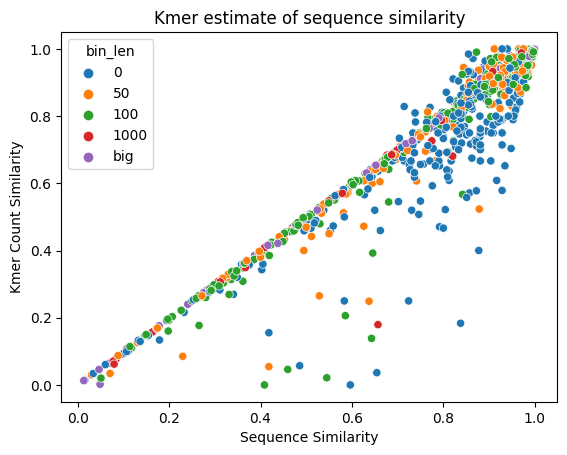

In [183]:
import seaborn as sb
p = sb.scatterplot(data=data, x='seqsim', y='pj', hue='bin_len')
p.set(title="Kmer estimate of sequence similarity", xlabel="Sequence Similarity", ylabel="Kmer Count Similarity")

In [166]:
print(pearsonr(data['unroll'], data['pj']))

PearsonRResult(statistic=0.9361582055174525, pvalue=0.0)


[Text(0.5, 1.0, 'Kmer estimate of unroll sequence similarity'),
 Text(0.5, 0, 'Unroll Sequence Similarity'),
 Text(0, 0.5, 'Kmer Count Similarity')]

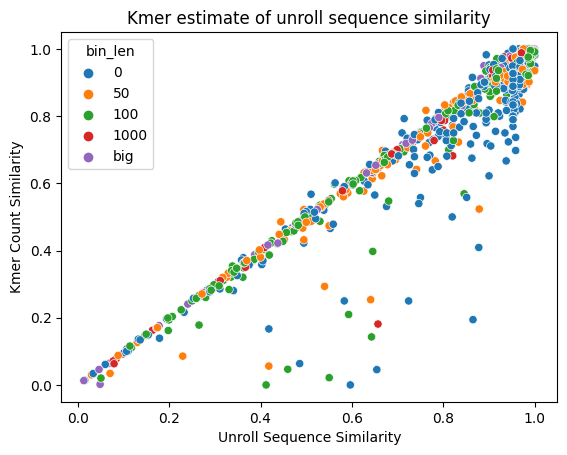

In [178]:
import seaborn as sb
p = sb.scatterplot(data=data, x='unroll', y='pj', hue='bin_len')
p.set(title="Kmer estimate of unroll sequence similarity", xlabel="Unroll Sequence Similarity", ylabel="Kmer Count Similarity")

/Users/english/py/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


[Text(0.5, 1.0, 'Cosine Sim by Sequence Similarity'), Text(0.5, 0, 'pj')]

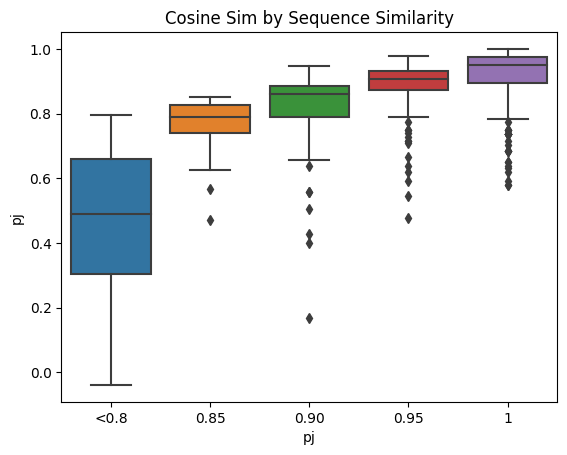

In [134]:
p = sb.boxplot(data=data, x="bin_sim", y="pj") 
p.set(title="Cosine Sim by Sequence Similarity", xlabel="pj")

/Users/english/py/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


[Text(0.5, 1.0, 'Cosine Sim by Sequence Similarity (≥90% size sim)'),
 Text(0.5, 0, 'seqsim')]

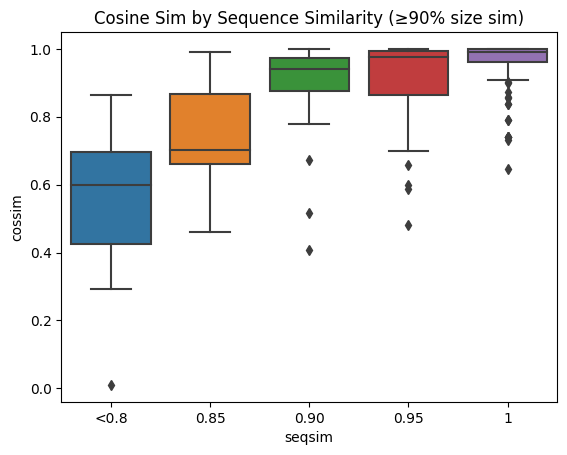

In [99]:
p = sb.boxplot(data=data[data['szsim'] >= 0.90], x="bin_sim", y="cossim") 
p.set(title="Cosine Sim by Sequence Similarity (≥90% size sim)", xlabel="seqsim")

/Users/english/py/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


[Text(0.5, 1.0, 'Cosine Sim by Sequence Similarity (≥90% size sim)'),
 Text(0.5, 0, 'seqsim')]

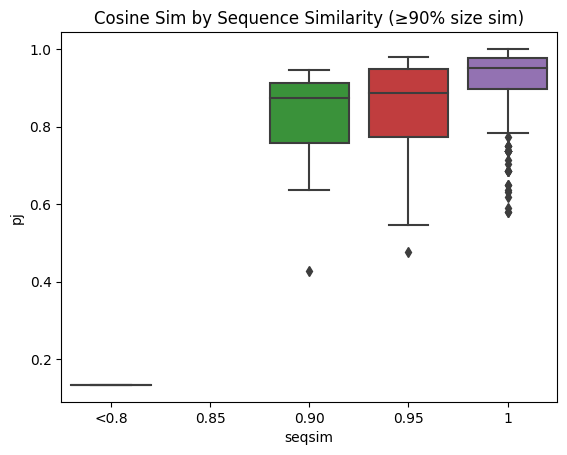

In [133]:
p = sb.boxplot(data=data[data['szsim'] >= 0.90], x="bin_sim", y="pj") 
p.set(title="Cosine Sim by Sequence Similarity (≥90% size sim)", xlabel="seqsim")

In [54]:
from scipy.stats import pearsonr

In [122]:
print(pearsonr(data['unroll'], data['cossim']))
print(pearsonr(data[data['szsim'] >= 0.90]['unroll'], data[data['szsim'] >= 0.90]['cossim']))

PearsonRResult(statistic=0.2811538443944157, pvalue=6.9316925410650485e-18)
PearsonRResult(statistic=0.4634334901956878, pvalue=5.420899054389294e-21)


In [123]:
print(pearsonr(data['unroll'], data['pj']))
print(pearsonr(data[data['unroll'] >= 0.90]['unroll'], data[data['unroll'] >= 0.90]['pj']))

PearsonRResult(statistic=0.8686452647883874, pvalue=2.306001161026309e-277)
PearsonRResult(statistic=0.3661793741734319, pvalue=2.4067014225019867e-15)


In [112]:
print(pearsonr(view['seqsim'], view['pj']))
print(pearsonr(view[view['szsim'] >= 0.90]['seqsim'], view[view['szsim'] >= 0.90]['exp'].fillna(0)))

PearsonRResult(statistic=0.24921569088172635, pvalue=3.6358115163009063e-14)
PearsonRResult(statistic=0.057352589334411314, pvalue=0.2771186830697372)


<Axes: xlabel='szsim', ylabel='cossim'>

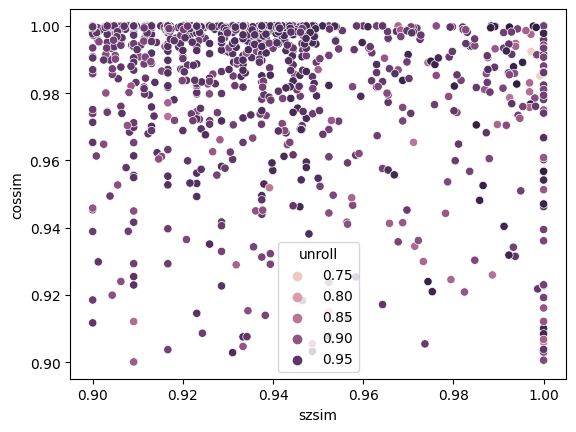

In [26]:
sb.scatterplot(data=data[(data['szsim'] >= 0.90) & (data['cossim'] >= 0.90)], hue='unroll', y='cossim', x='szsim')

<Axes: xlabel='unroll'>

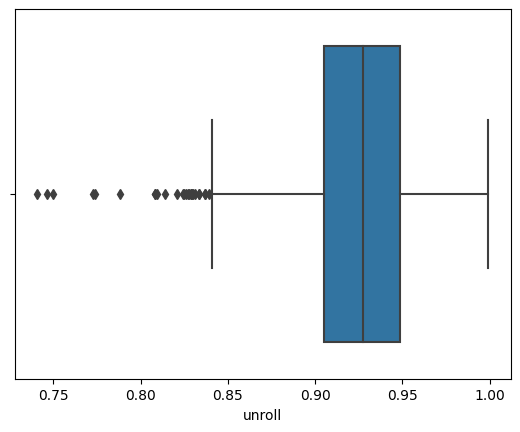

In [31]:
sb.boxplot(data=data[(data['szsim'] >= 0.80) & (data['cossim'] >= 0.80)], x="unroll")

In [1]:
from kdp import *

Let's build a graph from a region that's super simple (hom, both matching) first.

We'll have the H (haplotypes (or reads) graph) and G (graph variants to be phased/genotyped).

Starting at the snk of H - we'll have two options, use it, or don't use it.

For the use it, we check every neighboring node for G from snk and record the sizediff and cossim.
    if the sizediff and cossim is above thresholds,
        We apply Hn to Gn, update our running Hsk and Gsk (size and kmer features of the paths being joined).

if we can't use it, well.. because we have in the graph snk->everyNode, we know we've checked Use it and don't use it.
So, not using it is just saying, 'well go to the next node'.

Okay, we we have two things.
    Hi and Gi
    And we try to apply each Hi+1 to Gi+1,
    If none of them are good enough... we need to try and both Hi+1 and Hi+2 as well as just moving to Hi+2.
    That's the problem here.
    
    
```
Initialize dp[] with appropriate initial values

for each node a in graph A's full path:
    for each node b in graph B:
        if b's parent has been visited in graph A's path:
            dp[b] = max(dp[b], dp[b's parent] + weight of (b's parent to b))

Find the node b_last with the maximum value in dp[]
Backtrack from b_last to find the actual path in graph B
```

 

In [1]:
import pysam
import kdp
import numpy as np
bam = pysam.AlignmentFile("test/NA24385.chr20.bam")
ref = pysam.FastaFile("/Users/english/code/references/grch38/GRCh38_1kg_mainchrs.fa")

In [2]:
#chrom, start, end = "chr20", 28797607-50, 28797607+120+50 # deletion
chrom, start, end = "chr20", 20827970, 20827980

In [3]:
refseq = ref.fetch(chrom, start, end)
reads = bam.fetch(chrom, start, end)

```
M	BAM_CMATCH	0
I	BAM_CINS	1
D	BAM_CDEL	2
N	BAM_CREF_SKIP	3
S	BAM_CSOFT_CLIP	4
H	BAM_CHARD_CLIP	5
P	BAM_CPAD	6
=	BAM_CEQUAL	7
X	BAM_CDIFF	8
B	BAM_CBACK	9
```

In [8]:
help(bam.pileup)

Help on method pileup in module pysam.libcalignmentfile:

pileup(contig=None, start=None, stop=None, region=None, reference=None, end=None, **kwargs) method of pysam.libcalignmentfile.AlignmentFile instance
    AlignmentFile.pileup(self, contig=None, start=None, stop=None, region=None, reference=None, end=None, **kwargs)
    perform a :term:`pileup` within a :term:`region`. The region is
            specified by :term:`contig`, `start` and `stop` (using
            0-based indexing).  :term:`reference` and `end` are also accepted for
            backward compatibility as synonyms for :term:`contig` and `stop`,
            respectively.  Alternatively, a samtools 'region' string
            can be supplied.
    
            Without 'contig' or 'region' all reads will be used for the
            pileup. The reads will be returned ordered by
            :term:`contig` sequence, which will not necessarily be the
            order within the file.
    
            Note that :term:`SAM` form

In [4]:
all_cov = 0
all_ks = {} # readname: Haplotype
chrom, start, end = "chr20", 20827970, 20827980
BUFFER = 500
for column in bam.pileup(chrom, start - BUFFER, end + BUFFER, truncate=True):
    # Check for deletions

    for read in column.pileups:
        # Guard against partial alignments which mess up the kfeat 
        # Will revisit when I can turn a Haplotype into a single-path graph
        if not ((read.alignment.reference_start < start) and (read.alignment.reference_end > end)):
            continue
        all_cov += 1
        # Only consider things greater than 20bp
        if abs(read.indel) < 20:
            continue
        if read.indel > 20:  # Insertion greater than 20 bp
            seq = read.alignment.query_sequence[read.query_position:read.query_position + read.indel]
            m_hap = kdp.Haplotype(kdp.seq_to_kmer(seq, 4), read.indel, 1)
        elif read.indel < -20:  # Deletion greater than 20 bp
            m_start = column.reference_pos - start
            m_end = m_start + abs(read.indel)
            m_hap = kdp.Haplotype(-kdp.seq_to_kmer(refseq[m_start: m_end], 4), read.indel, 1)
        if read.alignment.query_name not in all_ks:
            all_ks[read.alignment.query_name] = m_hap
        else:
            all_ks[read.alignment.query_name] += m_hap
# Region coverage
reg_cov = all_cov / (end - start)

len(all_ks), reg_cov
all_ks['reference'] = kdp.Haplotype(kdp.seq_to_kmer("", 4), 0, reg_cov - len(all_ks))

In [7]:
dir(column)

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'get_mapping_qualities',
 'get_num_aligned',
 'get_query_names',
 'get_query_positions',
 'get_query_qualities',
 'get_query_sequences',
 'n',
 'nsegments',
 'pileups',
 'pos',
 'reference_id',
 'reference_name',
 'reference_pos',
 'set_min_base_quality',
 'tid']

In [46]:
len(all_ks)

11

Try to make two groups from just the alts:

If our two groups don't separate, we either have HOMALT or REFHET.
Either way, the whole group of alts becomes hap2.
We then decide if we want hap1 to be REF or HOMALT based on the proportion ( 85%+ becomes HOMALT )

If they do separate, then we just choose one to be hap1 and one to be hap2

In [5]:
# For this example region, we know there's just a single hap
hap1 = kdp.Haplotype.new(4)
hap1.kfeat = np.mean([_.kfeat for _ in all_ks.values()], axis=0)
hap1.size = np.mean([_.size for _ in all_ks.values()])
hap1.n = np.mean([_.n for _ in all_ks.values()])
hap1.coverage = len(all_ks)

In [32]:
# Figuring out how to handle compound variants, I'll try to make upto two haps.
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2, random_state = 0)

In [ ]:
# if number of variant reads is approximately 50%, we expect only 1 alternate group
# if the number of variant reads is like ≥80%, we expect possibly a compound het, or a hom 
# if the number of variant reads is approximately 0%, we expect reference homozygous across

In [59]:
y = [1 if _ != 'reference' else 0 for _ in all_ks.keys()]

In [63]:
weight = [_.coverage for _ in all_ks.values()]
weight

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [64]:
group = kmeans.fit_predict([_.kfeat for _ in all_ks.values()], sample_weight=weight)

# if t
grps = list(zip(, all_ks.keys()))
grps

[(0, 'm54329U_201103_231616/14680702/ccs'),
 (0, 'm54329U_201103_231616/146802986/ccs'),
 (0, 'm54329U_201103_231616/81789676/ccs'),
 (0, 'm54329U_201103_231616/64227876/ccs'),
 (0, 'm54329U_201103_231616/6490175/ccs'),
 (0, 'm54329U_201103_231616/127994120/ccs'),
 (0, 'm54329U_201103_231616/88409094/ccs'),
 (0, 'm54329U_201103_231616/58982504/ccs'),
 (0, 'm54329U_201103_231616/105840958/ccs'),
 (0, 'm54329U_201103_231616/32441695/ccs'),
 (1, 'reference')]

In [ ]:
len(all_ks)

In [69]:
base = "TGTGTGCTGAGTCCAGCTCAAGTCCCTTGGTTCCCACTGCTGCTAAGCATGCACG"; comp = "GTGTGCGTGTGCCACCATGCCTCCTTTTCCCACCGCTTTAGTGATGGATGCTGG"

In [30]:
import pandas as pd
rows = []
for line in open("test/diff.txt"):
    is_kdp = line.startswith("\t")
    data = line.strip().split('\t')
    rows.append([is_kdp, data[2], int(data[3]), data[0], data[1]])
data = pd.DataFrame(rows, columns=["is_kdp", "svtype", "svlen", 'chrom', 'pos'])

In [31]:
data['is_kdp'].value_counts()

is_kdp
False    91
True     29
Name: count, dtype: int64

In [27]:
data['is_kdp'].value_counts()

is_kdp
False    91
True     37
Name: count, dtype: int64

In [32]:
data[~data['is_kdp'] & (data['svtype'] == 'DEL')]

,is_kdp,svtype,svlen,chrom,pos
5,False,DEL,84,chr20,18112234
15,False,DEL,230,chr20,24408074
17,False,DEL,3404,chr20,26310314
18,False,DEL,5123,chr20,26316951
22,False,DEL,97,chr20,31219928
29,False,DEL,70,chr20,38708340
42,False,DEL,50,chr20,47156115
48,False,DEL,587,chr20,48505243
49,False,DEL,2062,chr20,48506452
50,False,DEL,392,chr20,48509044


<Axes: xlabel='svtype', ylabel='count'>

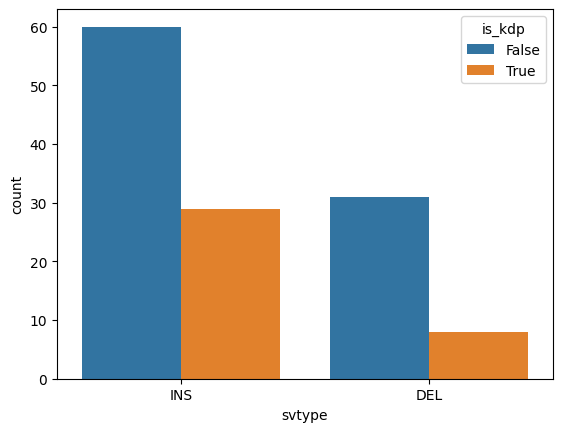

In [25]:
import seaborn as sb
sb.countplot(data=data, x="svtype", hue="is_kdp")

In [75]:
target = 50
outs = [-50, 50]
sorted([(abs(target - i),j) for j,i in enumerate(outs)])

[(0, 1), (100, 0)]

In [80]:
def pareto_optimal_tuples(tuples):
    pareto_optimal = []
    dominated_indices = set()
    for i, (x1, y1, z1) in enumerate(tuples):
        if i in dominated_indices:
            continue
        is_pareto = True
        for j, (x2, y2, z2) in enumerate(tuples):
            if i != j and (x2 >= x1 or y2 >= y1 or z2 >= z1):
                if x2 > x1 or y2 > y1 or z2 > z1:
                    is_pareto = False
                    dominated_indices.add(i)
                    break
                else:
                    dominated_indices.add(j)
        if is_pareto:
            pareto_optimal.append((x1, y1, z1))
    return pareto_optimal

# Example usage:
tuples = [(1, 2, 3), (4, 5, 6), (3, 6, 9), (7, 8, 8)]
pareto_optimal = pareto_optimal_tuples(tuples)
print("Pareto optimal tuples:", pareto_optimal)


Pareto optimal tuples: []


In [126]:
import math
def genotyper(totCov, altCov, priors=None):
    """
    Given total coverage and altCoverage, try to calculate how many copies
    of the alt are at the position (ref/het/hom) and a quality score
    returns two lists
    - probabilities of 0, 1, or two copies of the allele at the location
    - phred-scaled quality scores of those probs
    """
    #We have no information.. should give up
    if totCov == 0:
        return None

    # previously had avgCov
    if priors is None:
        priors = [0.05, 0.5, 0.95]

    # if len(priors) != 3: # raise exception?

    def log_choose(n, k):
        """ swap for efficiency if k is more than half of n """
        r = 0.0
        if k * 2 > n:
            k = n - k

        for d in range(1, k + 1):
            r += math.log(n, 10)
            r -= math.log(d, 10)
            n -= 1

        return r

    total = totCov  # refCoverage + altCoverage if avgCov is None else avgCov
    alt = altCov  # int(spot.tags["szCount"])
    non_alt = total - alt

    gtList = []

    comb = log_choose(total, alt)
    for p_alt in priors:
        gtList.append(comb + alt * math.log(p_alt, 10) + non_alt * math.log(1 - p_alt, 10))

    return gtList

In [186]:
genotyper(5, 4)

[-4.527426373031058, -0.806179973983887, -0.6911655701725709]

In [53]:
from dataclasses import dataclass

@dataclass
class Node():
    value: int = 0
    def __hash__(self):
        return self.value

In [69]:
aNodes = [Node(1), Node(10), Node(20)]
import networkx as nx
g = nx.DiGraph()
one = Node(1)
nine = Node(9)
four = Node(4)
twenty = Node(20)
for i in [one, nine, four, twenty]:
    g.add_edge('src', i)
    g.add_edge(i, 'snk')
g.add_edge(one, nine)
g.add_edge(one, four)
g.add_edge(one, twenty)
g.add_edge(nine, twenty) # can only use one of nine/twenty
g.add_edge(four, twenty)

Let's just do a zip.

I'm going to start at aNodes_0
I'm going to apply it to every node that is an edge to src.

If it matches, then pop aNodes_0 and set cur_node to the edgedest, we have a new anchor point.

If it matches none, then we add to aNodes_0 the next variant and try again.

If it doesn't match any, then I pop aNodes 0 and try again.

A -> B -> C


In [103]:
def similarity_metric(path1, path2):
    # Define your similarity metric here, for example, the number of common nodes
    ret = sum(int(a == b) for a, b in zip(path1, path2))
    print(ret)
    return ret
    #return len(set(path1) & set(path2))

In [12]:
import kdp
import logging
import pysam
import truvari
import networkx as nx
def vcf_haps(variants, kmer=4):
    """
    Parse a set of phased variants and return the two Haplotypes
    """
    h1 = []
    h2 = []
    for entry in variants:
        m_hap = kdp.Haplotype.from_vcf(entry, kmer)
        if entry.samples[0]['GT'][0] == 1:
            h1.append(m_hap)
        if len(entry.samples[0]['GT']) > 1 and entry.samples[0]['GT'][1] == 1:
            h2.append(m_hap)
    return h1, h2

def vars_to_graph(variants, kmer=4):
    """
    For a sorted set of variants, make a graph
    Returns the digraph (and variants not used?)
    """
    keep_vars = []
    unused_vars = []
    for entry in variants:
        hap = kdp.Haplotype.from_vcf(entry, kmer)
        if hap.size != 0:
            keep_vars.append((truvari.entry_to_hash(entry), hap, entry))
        else:
            unused_vars.append(entry)

    graph = nx.DiGraph()
    graph.add_node('src', hap=kdp.Haplotype.new(kmer), entry=None)
    graph.add_node('snk', hap=kdp.Haplotype.new(kmer), entry=None)
    for key, hap, entry in keep_vars:
        logging.debug("%s %s", key, str(v))
        graph.add_node(key, hap=hap, entry=entry)
        graph.add_edge('src', key)
        graph.add_edge(key, 'snk')

    # link the variants
    for i in range(len(keep_vars) - 1):
        up_key, _, up_var = keep_vars[i]
        up = truvari.entry_boundaries(up_var)
        for j in range(i + 1, len(keep_vars)):
            dn_key, _, dn_var = keep_vars[j]
            dn = truvari.entry_boundaries(dn_var)
            if not truvari.overlaps(up[0], up[1], dn[0], dn[1]):
                graph.add_edge(up_key, dn_key)
    return graph, unused_vars

In [13]:
chrom, start, end = "chr20", 8031130, 8032374

v = pysam.VariantFile("test/GRCh38_HG002-T2TQ100-V1.0_stvar.vcf.gz")
hap1, hap2 = vcf_haps(v.fetch(chrom, start, end))

v = pysam.VariantFile("/Users/english/code/aou_sv_merge/intermerge/hgsvc2/truvari_collapsed.vcf.gz")
graph = vars_to_graph(v.fetch(chrom, start, end), 4)[0]

In [14]:
import numpy as np
THRESH = 0.90
def longest_common_subsequence(graph, path1, path2):
    # Compute the length of the longest common subsequence between two paths
    m, n = len(path1), len(path2)
    dp = [[0] * (n + 1) for _ in range(m + 1)]

    for i in range(1, m + 1):
        for j in range(1, n + 1):
            ssim, _ = truvari.sizesim(graph.nodes[path1[i-1]]['hap'].size, path2[j - 1].size)
            csim = kdp.weighted_cosinesim(graph.nodes[path1[i - 1]]['hap'].kfeat, path2[j - 1].kfeat)
            if ssim >= THRESH and csim >= THRESH: # If they're over the similarity minimums
                dp[i][j] = dp[i - 1][j - 1] + csim # Matched, add one to the previous match
            else:
                dp[i][j] = max(dp[i - 1][j], dp[i][j - 1]) # 

    ret = dp[m][n]
    #print(ret, '\t\t', "".join(path1), "<---\t--->", "".join(path2))
    return ret, None

def dfs(g, target, cur_node=None, cur_len=0, path=None): 
    if not cur_node:
        cur_node = 'src'
    else:
        if path is None:
            path = []
        path.append(cur_node)
    cur_len += g.nodes[cur_node]['hap'].size
    diffs = sorted([(abs(target - (cur_len + g.nodes[n]['hap'].size)), n)
                   for _, n in g.out_edges(cur_node)])
    for _, next_node in diffs:
        if next_node == 'snk' and cur_node != 'src':
            yield list(path)
        else:
            n_path = list(path)
            for sub_path in dfs(g, target, next_node, cur_len, n_path):
                yield sub_path

In [15]:
def align_to_graph(graph, haplotype, start_node='src', mincos=0.90, minsize=0.90, wcoslen=2000):
    """
    Align a haplotype to a graph
    Return the graph path and haplotype path used.
    """
    best_path_hap = []
    best_score = 0
    best_path_graph = []
    n_attempts = 0
    target_len = sum(_.size for _ in haplotype)
    for n_path in dfs(graph, target_len, start_node):
        print("trying", n_path)
        n_attempts += 1
        n_score, best_path_graph = longest_common_subsequence(graph, n_path, haplotype)
        print(n_score, best_path_graph)
        if n_score > best_score:
            best_score = n_score
            best_path_hap = n_path
        elif n_score == best_score and (len(n_path) < len(best_path_hap)): #prefer fewer changes
            best_path_hap = n_path
        if n_attempts >= 100:
            break
    return best_path_graph, best_path_hap

In [16]:
start_node = None
target_path = hap2


# Find the first graph node that matches to the target path
# If no graph node matches t_idx[0], then increase t_idx
# Pick the starting point - Only do this when the target and graph are complex.
# Let's do the first one, we have a single target_path node, so just find its best match
# But we also need to allow it to combine in the case of split graph.
# So, It goes through the whole thing with the exception of anchor.

result = align_to_graph(graph, target_path, start_node='src', mincos=0.90, minsize=0.90, wcoslen=2000)


trying ['src', 'dcedc19956e539c5bbad3582ce6a1480c565cda2']
0 None
trying ['src', 'dcedc19956e539c5bbad3582ce6a1480c565cda2', '94aeca41ecea467f214c43fe57a50425c6e85a62']
0 None
trying ['src', 'dcedc19956e539c5bbad3582ce6a1480c565cda2', '94aeca41ecea467f214c43fe57a50425c6e85a62', '716c0317c70673f9f7edfadc04bded59891880dc']
0 None
trying ['src', 'dcedc19956e539c5bbad3582ce6a1480c565cda2', 'efba80a423c9a50fb92f5f47f2ca6d8a7ce8b2dd']
0 None
trying ['src', 'dcedc19956e539c5bbad3582ce6a1480c565cda2', 'efba80a423c9a50fb92f5f47f2ca6d8a7ce8b2dd', '94aeca41ecea467f214c43fe57a50425c6e85a62']
0 None
trying ['src', 'dcedc19956e539c5bbad3582ce6a1480c565cda2', 'efba80a423c9a50fb92f5f47f2ca6d8a7ce8b2dd', '94aeca41ecea467f214c43fe57a50425c6e85a62', '716c0317c70673f9f7edfadc04bded59891880dc']
0 None
trying ['src', 'dcedc19956e539c5bbad3582ce6a1480c565cda2', 'efba80a423c9a50fb92f5f47f2ca6d8a7ce8b2dd', '716c0317c70673f9f7edfadc04bded59891880dc']
0 None
trying ['src', 'dcedc19956e539c5bbad3582ce6a1480c565cd

In [19]:
for k,n in graph.nodes.items():
    print(k, n['entry'])

src None
snk None
1ab39dff06fc5af6366551bc222faf4d1142fb99 chr20	8031512	pbsv.INS.183	T	TATGTATGTATGTATGATGTATGTATGATGTATGTATGTATGATGTATGTATGATGTATGTATGATGTATGTATGTATGATGTATGTATGATGTATGTATGATGTATGTATGTATGATGTATGTATGATGTATGATGTATGTATGTATGATGTATGTATGTATGATGTATGTATGATGTATGTATGATGTATG	3	PASS	SVTYPE=INS;SVLEN=192;SVANN=TANDEM;AC=1	GT:AD:DP:SAC:SUPP	./.:.:.:.:.	./.:.:.:.:.	./.:.:.:.:.	./.:.:.:.:.	./.:.:.:.:.	./.:.:.:.:.	./.:.:.:.:.	./.:.:.:.:.	./.:.:.:.:.	./.:.:.:.:.	./.:.:.:.:.	0/1:6,3:9:3,3,2,1:1	./.:.:.:.:.	./.:.:.:.:.

9a4086d2c45a87751cebde7061f0c9705d6d8425 chr20	8031517	Sniffles2.INS.50S13	A	ATGTATGTATGATGTATGTATGATGTATGTATGTATGATGTATGTATGATGTATGTATGATGTATGTATGTATGATGTATGTATGATGTATGTATG	2	PASS	PRECISE;SVTYPE=INS;SVLEN=95;SUPPORT=3;COVERAGE=8,9,9,9,9;STRAND=+-;AF=0.333;STDEV_LEN=0;STDEV_POS=0;SUPPORT_LONG=0;AC=1	GT:GQ:DR:DV:SUPP	./.:.:.:.:.	./.:.:.:.:.	./.:.:.:.:.	./.:.:.:.:.	./.:.:.:.:.	./.:.:.:.:.	./.:.:.:.:.	./.:.:.:.:.	./.:.:.:.:.	./.:.:.:.:.	./.:.:.:.:.	0/1:13:6:3:2	./.:.:.:.:.	./

In [23]:
hap2

[Haplotype(kfeat=array([-1.,  6.,  0.,  0., 11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  5.,
         5.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0

In [20]:
for i in result[1]:
    print(graph.nodes[i]['entry'])

None
chr20	8031594	pbsv.INS.238	G	GATGTATGTATGATGTATGATGTATGTATGTATGTATGATGTATGTATGTATGATGTATGTATGATGTATGTATGATGTATGATGTATGTATGTATGTATGATGTATGTATGTATGATGTATGTGTGTATGATGTATGTATGT	3	PASS	SVTYPE=INS;SVLEN=142;SVANN=TANDEM;AC=1	GT:AD:DP:SAC:SUPP	./.:.:.:.:.	./.:.:.:.:.	./.:.:.:.:.	./.:.:.:.:.	./.:.:.:.:.	./.:.:.:.:.	./.:.:.:.:.	0/1:4,4:8:2,2,2,2:1	./.:.:.:.:.	./.:.:.:.:.	./.:.:.:.:.	./.:.:.:.:.	./.:.:.:.:.	./.:.:.:.:.

chr20	8031631	chr20-8031632-INS-86	G	GTATGATGTATGTATGATGTATGTATGATGTATGATGTATGTATGTATGTATGATGTATGTATGTATGATGTATGTGTGTATGATGT	4	.	ID=chr20-8031632-INS-86;SVTYPE=INS;SVLEN=86;TIG_REGION=h2tg021944l:13667-13752;QUERY_STRAND=+;HOM_REF=0,0;HOM_TIG=0,0;NumCollapsed=1;NumConsolidated=1;CollapseId=28855.0;AC=2	GT:SUPP:DR:DV:GQ	./.:.:.:.:.	./.:.:.:.:.	./.:.:.:.:.	./.:.:.:.:.	./.:.:.:.:.	./.:.:.:.:.	./.:.:.:.:.	./.:.:.:.:.	./.:.:.:.:.	./.:.:.:.:.	0/1:4:.:.:.	./.:.:.:.:.	0/1:6:8:9:54	./.:.:.:.:.

chr20	8031632	Sniffles2.INS.55S13	A	TATGATGTATGTATGATGTATGTATGATGTATGATGTATGTATGTATGTATGAT

In [ ]:
import numpy as np
THRESH = 0.90
def longest_common_subsequence(path1, path2):
    # Compute the length of the longest common subsequence between two paths
    m, n = len(path1), len(path2)
    dp = [[0] * (n + 1) for _ in range(m + 1)]

    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if path1[i - 1] == path2[j - 1]: # If they're over the similarity minimums
                dp[i][j] = dp[i - 1][j - 1] + 1 # Matched, add one to the previous match
            else:
                dp[i][j] = max(dp[i - 1][j], dp[i][j - 1]) # 

    ret = dp[m][n]
    #print(ret, '\t\t', "".join(path1), "<---\t--->", "".join(path2))
    return ret

def dfs(g, target, cur_len=0, cur_node=None, path=None): 
    if not cur_node:
        cur_node = 'src'
    else:
        if path is None:
            path = []
        path.append(cur_node)
    cur_len += g.nodes[cur_node]['hap'].size
    diffs = sorted([(abs(target - (cur_len + g.nodes[n]['hap'].size)), n)
                   for _, n in g.out_edges(cur_node)])
    for next_node in diffs:
        if next_node == 'snk' and cur_node != 'src':
            yield list(path)
        else:
            n_path = list(path)
            for sub_path in dfs(g, next_node, n_path):
                yield sub_path

In [39]:
# Example usage:
import itertools
graph = {
    'src': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'snk'],
    'A': ['B', 'C', 'D', 'E', 'F', 'G', 'snk'],
    # B/C overlapping
    'B': ['D', 'E', 'F', 'G', 'snk'],
    'C': ['D', 'E', 'F', 'G', 'snk'],
    'D': ['E', 'F', 'G', 'snk'],
    'E': ['F', 'G', 'snk'],
    'F': ['G', 'snk'],
    'G': ['snk'],
    'snk': [],
}

start_node = 'src'
target_path = ['Do', 'lamma', 'B', 'R', 'D', 'X', 'Y', 'G']  # Example target path with extra nodes

graph_nodes = list(graph.keys())
t_idx = 0
g_idx = 0

# Find the first graph node that matches to the target path
# If no graph node matches t_idx[0], then increase t_idx
# Pick the starting point
for t_start, start_node in itertools.product(target_path, graph_nodes[1:-1]):
    if t_start == start_node:
        break
target_path = target_path[target_path.index(t_start):]    

# Iterate all the paths, trying to find the best.
best_path = []
best_score = 0
n_attempts = 0
for n_path in dfs(graph, start_node):
    print("trying", n_path)
    n_attempts += 1
    n_score = longest_common_subsequence(n_path, target_path)
    if n_score > best_score:
        best_score = n_score
        best_path = n_path
    elif n_score == best_score and (len(n_path) < len(best_path)): #prefer fewer changes
        best_path = n_path
        
print(best_path, n_attempts)

# So now I need to figure out what happens when we don't have an anchor?
# Like, If 


trying ['B', 'D', 'E', 'F', 'G']
trying ['B', 'D', 'E', 'F']
trying ['B', 'D', 'E', 'G']
trying ['B', 'D', 'E']
trying ['B', 'D', 'F', 'G']
trying ['B', 'D', 'F']
trying ['B', 'D', 'G']
trying ['B', 'D']
trying ['B', 'E', 'F', 'G']
trying ['B', 'E', 'F']
trying ['B', 'E', 'G']
trying ['B', 'E']
trying ['B', 'F', 'G']
trying ['B', 'F']
trying ['B', 'G']
trying ['B']
['B', 'D', 'G'] 16


In [143]:
# Example usage:
# Try again, but this time have sizes
# Also, move this to a DiGraph
import itertools
import networkx as nx

g = nx.DiGraph()
g.add_edge('src', 'snk')
variants = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
sizes = [40, 100, 125, 
for i in 
for i in range(len(variants) - 1):
    for j in range(i + 1, len(variants)):
        g.add_node
for i in 
graph = {
    'src': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'snk'],
    'A': ['B', 'C', 'D', 'E', 'F', 'G', 'snk'],
    # B/C overlapping
    'B': ['D', 'E', 'F', 'G', 'snk'],
    'C': ['D', 'E', 'F', 'G', 'snk'],
    'D': ['E', 'F', 'G', 'snk'],
    'E': ['F', 'G', 'snk'],
    'F': ['G', 'snk'],
    'G': ['snk'],
    'snk': [],
}

start_node = 'src'
target_path = ['D', 'lamma', 'B', 'R', 'D', 'X', 'Y', 'G']  # Example target path with extra nodes

graph_nodes = list(graph.keys())
t_idx = 0
g_idx = 0

# Find the first graph node that matches to the target path
# If no graph node matches t_idx[0], then increase t_idx
# Pick the starting point
for t_start, start_node in itertools.product(target_path, graph_nodes[1:-1]):
    if t_start == start_node:
        break
target_path = target_path[target_path.index(t_start):]    

# Iterate all the paths, trying to find the best.
best_path = []
best_score = 0
n_attempts = 0
for n_path in dfs(graph, start_node):
    print("trying", n_path)
    n_attempts += 1
    n_score = longest_common_subsequence(n_path, target_path)
    if n_score > best_score:
        best_score = n_score
        best_path = n_path
    elif n_score == best_score and (len(n_path) < len(best_path)): #prefer fewer changes
        best_path = n_path
        
print(best_path, n_attempts)

# So now I need to figure out what happens when we don't have an anchor?
# Like, If 


['D'] ['B', 'R', 'D', 'X', 'Y', 'G'] 1
['E'] ['B', 'R', 'D', 'X', 'Y', 'G'] 0
['F'] ['B', 'R', 'D', 'X', 'Y', 'G'] 0
['G'] ['B', 'R', 'D', 'X', 'Y', 'G'] 1
['E'] ['B', 'R', 'D', 'X', 'Y', 'G'] 0
['F'] ['B', 'R', 'D', 'X', 'Y', 'G'] 0
['G'] ['B', 'R', 'D', 'X', 'Y', 'G'] 1
Most similar path: []


In [118]:
10**((5.727597453449266)/10)

3.7390368499084894

In [187]:
import pysam
bam = pysam.AlignmentFile("/Users/english/code/kfdphase/kdprs/test/GIABHG002.bam")
aln = next(bam)

In [197]:
dir(bam)

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__next__',
 '__pyx_vtable__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '_open',
 'add_hts_options',
 'category',
 'check_index',
 'check_truncation',
 'close',
 'closed',
 'compression',
 'count',
 'count_coverage',
 'description',
 'duplicate_filehandle',
 'fetch',
 'filename',
 'find_introns',
 'find_introns_slow',
 'format',
 'get_index_statistics',
 'get_reference_length',
 'get_reference_name',
 'get_tid',
 'getrname',
 'gettid',
 'has_index',
 'head',
 'header',
 'index_filename',
 'is_bam',
 'is_bcf',
 'is_closed',
 'is_cram',
 'is_open',
 'is_read',
 'is_remote',
 'is_sam',
 'is_stream',
 'is_valid_reference_name',
 'is_valid_tid',
 'is_vc

In [227]:
x = pysam.AlignedSegment(bam.header)

In [211]:
x.tid = 0

In [223]:
pysam.Align

['__class__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'aend',
 'alen',
 'aligned_pairs',
 'bin',
 'blocks',
 'cigar',
 'cigarstring',
 'cigartuples',
 'compare',
 'flag',
 'from_dict',
 'fromstring',
 'get_aligned_pairs',
 'get_blocks',
 'get_cigar_stats',
 'get_forward_qualities',
 'get_forward_sequence',
 'get_overlap',
 'get_reference_positions',
 'get_reference_sequence',
 'get_tag',
 'get_tags',
 'has_tag',
 'header',
 'infer_query_length',
 'infer_read_length',
 'inferred_length',
 'is_duplicate',
 'is_forward',
 'is_mapped',
 'is_paired',
 'is_proper_pair',
 'is_qcfail',
 'is_read1',
 'is_read2',
 'is_reverse',
 'is_secondary',
 'is_supplementary

In [267]:
import pysam
import copy
def split_alignment(alignment, max_length, header):
    """
    Split a single alignment into multiple alignments with a maximum length.
    """
    if alignment.query_alignment_length <= max_length:
        return [alignment]
    
    curd = alignment.to_dict()
    sub_alignments = []
    num_splits = (alignment.query_alignment_length + max_length - 1) // max_length
    for idx,i in enumerate(range(num_splits)):
        start = i * max_length
        end = min(start + max_length, alignment.query_alignment_length)

        # dict_keys(['name', 'flag', 'ref_name', 'ref_pos', 'map_quality', 'cigar', 'next_ref_name', 
        # 'next_ref_pos', 'length', 'seq', 'qual', 'tags'])

        cur_align = copy.copy(curd)
        cur_align['ref_pos'] = start
        cur_align['cigar'] = None
        cur_align['seq'] = curd['seq'][start:start+50]
        cur_align['name'] = f"{curd['name']}_{idx}"

        sub_align = pysam.AlignedSegment.from_dict(cur_align, header=header)
        sub_align.from_dict(cur_align)

        #sub_align = pysam.AlignedSegment(header=header, 
        #                                 reference_name=alignment.reference_name,
        #                                pos=start)
        if alignment.has_tag("MD"):
            sub_align.set_tag("MD", alignment.get_tag("MD")[start:end])
        print(sub_align)
        sub_alignments.append(sub_align)
    return sub_alignments

def split_alignments(input_bam_path, output_bam_path, max_length=50000):
    """
    Split alignments longer than max_length into multiple alignments.
    """
    with pysam.AlignmentFile(input_bam_path, "rb") as input_bam, \
         pysam.AlignmentFile(output_bam_path, "w", header=input_bam.header) as output_bam:
        for alignment in input_bam:
            sub_alignments = split_alignment(alignment, max_length, input_bam.header)
            for sub_align in sub_alignments:
                output_bam.write(sub_align)

# Example usage
input_bam_file = "/Users/english/code/kfdphase/kdprs/test/GIABHG002.bam"
output_bam_file = "output.sam"
split_alignments(input_bam_file, output_bam_file)


TypeError: sequence item 3: expected str instance, int found

In [262]:
help(sub_align)

NameError: name 'sub_align' is not defined

In [289]:
x.keys()

dict_keys(['name', 'flag', 'ref_name', 'ref_pos', 'map_quality', 'cigar', 'next_ref_name', 'next_ref_pos', 'length', 'seq', 'qual', 'tags'])

In [290]:
x = aln.to_dict()
print(x['cigar'][:52])
print(x['flag'], x['qual'])


18165H610M3I284M236D917M2I333M3D15M1D87M1I1024M1I214
2048 *


In [286]:
x = aln.to_dict()
x['seq'] = x['seq'][:10]
x['cigar'] = "10M" # x['cigar'][:10]
x['tags'] = []

In [288]:
print(pysam.AlignedSegment.from_dict(x, s.header))

chr20_PATERNAL	2048	#0	89154	59	10M	*	0	0	ACACTGGTTG	None	[]


In [264]:
s = pysam.AlignmentFile(input_bam_file, "rb")

In [266]:
pysam.AlignedSegment.from_dict()

TypeError: from_dict() takes exactly 2 positional arguments (0 given)

In [248]:
x['seq'] = None
aln.from_dict(x, input)

TypeError: from_dict() takes exactly 2 positional arguments (1 given)

Help on method from_dict in module pysam.libcalignedsegment:

from_dict(sam_dict, header) method of builtins.type instance
    AlignedSegment.from_dict(cls, sam_dict, AlignmentHeader header)
    parses a dictionary representation of the aligned segment.
    
            Parameters
            ----------
            sam_dict:
                dictionary of alignment values, keys corresponding to output from
                :meth:`todict()`.

